## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df)

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
perc_not_converted = len(df.loc[df['converted'] == 0]) / len(df)
print('Not converted ' + str(perc_not_converted))

perc_converted = len(df.loc[df['converted'] == 1]) / len(df)
print('converted ' + str(perc_converted))

Not converted 0.8803408064439449
converted 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df_search = df.query('(group == "treatment" and landing_page != "new_page") or '
                     '(group != "treatment" and landing_page == "new_page")')
len(df_search)

3893

f. Do any of the rows have missing values?

In [10]:
df.isnull().values.any()
# não está faltando valores

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or '
                       '(group != "treatment" and landing_page == "new_page") or ' 
                       '(group == "control" and landing_page != "old_page") or ' 
                       '(group != "control" and landing_page == "old_page")').index)


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(['user_id'])]
#user_id 773192

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.duplicated(['user_id'], keep=False)]
# linhas com diferentes timestamp, as outras colunas são iguais

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df.drop(df2[df2.duplicated(['user_id'])].index)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
converted_users = len(df2.query('converted == 1')['user_id'])
prop = converted_users/len(df2)
print("The probability of an individual converting regardless of the page they receive is " + str(prop))

The probability of an individual converting regardless of the page they receive is 0.11965959990084116


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
converted_controlusers = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
control_users =float(df2.query('group == "control"')['user_id'].nunique())
control_group = converted_controlusers /control_users
print(" Given that an individual was in the control group, the probability they converted is " + str(control_group))

 Given that an individual was in the control group, the probability they converted is 0.12109853278155888


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
converted_controlusers = len(df2.query('converted == 1 and group == "treatment"'))
treat_users = len(df2.query('group == "treatment"'))
treatment_group = converted_controlusers / treat_users
print(" Given that an individual was in the treatment group, the probability they converted is " + str(treatment_group))

 Given that an individual was in the treatment group, the probability they converted is 0.11892038703106433


d. What is the probability that an individual received the new page?

In [20]:
new_page_users = len(df2.query('landing_page == "new_page"'))
Newpage_prop = new_page_users/len(df2)
print("The probability that an individual received the new page is " + str(Newpage_prop))

The probability that an individual received the new page is 0.49999830207452534


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The probability of an individual converting regardless of the page they receive is 11.96%, Given that an individual was in the control group, the probability they converted is 12.10% Given that an individual was in the treatment group, the probability they converted is 11.89%. The probablity users converted in both control and treatment group are pretty similar to each other and probability of an individual converting regardless of the page they receive. therefore, there is no evidence that ne page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- Null hypothese is H0: p_new - p_old <= 0
- Alternative hypothese is H1: p_new - p_old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
# calcular a taxa de sucesso que foram convertidas, que é igual a taxa de sucesso convertida independente da página.
p_new = round(len(df2.query('converted == 1'))/len(df2['user_id']),5)
p_new

0.11966

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
# Calcular a taxa de sucesso convertida antiga, que é igual à taxa de sucesso convertida, independentemente da página
p_old = round(len(df2.query('converted == 1'))/len(df2['user_id']),5)

p_old

0.11966

c. What is $n_{new}$?

In [28]:
#Calcular o número de usuários únicos que tem nova página usando o dataframe df2
N_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

N_new 

146317

d. What is $n_{old}$?

In [29]:
#Calcular o número de usuários únicos que tem uma página antiga usando o dataframe df2
N_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
N_old 

146265

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
#Simular n_new transações com uma taxa de conversão de p_new sob o valor nulo
new_page_converted = np.random.choice([0,1],N_new, p=(p_new,1-p_new))

new_page_converted 

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
#Simular transações n_old com uma taxa de conversão de p_old sob o valor nulo
old_page_converted = np.random.choice([0,1],N_old, p=(p_old,1-p_old))

old_page_converted

array([0, 1, 1, ..., 0, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
#Calcule a probabilidade de taxa convertida de nova página
new_page_converted.mean()

#Calcule a probabilidade da taxa convertida da página antiga
old_page_converted.mean()

#Find  pnewpnew  -  poldpold  for your simulated values from part (e) and (f).
new_page_converted.mean() - old_page_converted.mean()

0.0005410079295757875

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
#Import timeit package
import timeit
start = timeit.default_timer()

# Create sampling distribution for difference in completion rates
# with boostrapping
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],N_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],N_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
#Compute python running time.
stop = timeit.default_timer()
print(stop - start)

p_diffs = np.array(p_diffs)

485.4650452269707


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

-0.0016696756455219647

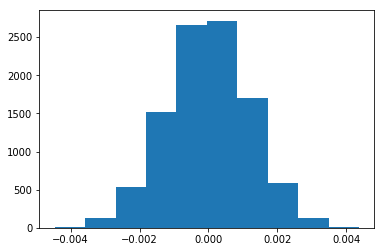

In [34]:
plt.hist(p_diffs)

# Create number of users with all new_page users and all new_page users
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

# Compute actual converted rate
actual_cvt_new = float(convert_new)/ float(N_new) 
actual_cvt_old = float(convert_old)/ float(N_old)

# Compute observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old

# Display observed difference in converted rate 
obs_diff

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.9151

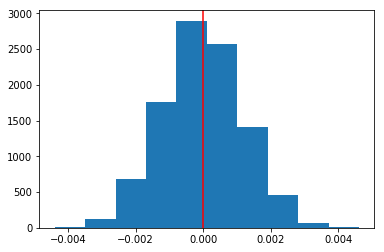

In [35]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(color ='red')

#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > obs_diff).mean()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


Type I error rate of 5%, and Pold > Alpha, we fail to reject the null. Therefore, the data show, with a type I error rate of 0.05, that the old page has higher probablity of convert rate than new page.

P-Value: The probability of observing our statistic or a more extreme statistic from the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old,convert_new,N_old,N_new


(17726, 17488, 146265, 146317)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([N_new,N_old]), alternative = 'larger')

z_score, p_value

from scipy.stats import norm

norm.cdf(z_score)
# 0.094941687240975514 # Tells us how significant our z-score is

norm.ppf(1-(0.05/2))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Since the z-score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054, we fail to reject the null hypothesis that old page users has a better or equal converted rate than old page users. Therefore, the converted rate for new page and old page have no difference. This result is the same as parts J. and K. result.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression, due to the fact that response variable is categorical variable. logistic regression is multiple regression but with an outcome variable that is a categorical variable and predictor variables that are continuous


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
#create a colun for the intercept
df2['intercept'] = 1

In [39]:
#create a dummy variable column for which page each user received
df2= df2.join(pd.get_dummies(df2['landing_page']))

In [40]:
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
#Create Logit regression model for conveted variable and  ab_page, and us control as baseline
lo = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

In [42]:
result = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366244
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               294477
Model:                          Logit   Df Residuals:                   294475
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 Jan 2019   Pseudo R-squ.:               7.085e-06
Time:                        22:25:58   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2164
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.236      0.216      -0.036       0.008


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.190. The null in c-e part is that there is no difference between the treatment and control group. Alternative hypotheses is that there is difference between between the treatment and control group

Part II assumes the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, compared to question c-e,they have different explainory varibale or factor for the result.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other factor can be the time(timestamp variable). We can check if the converted rate depends on certain time of the day or certain day when user browerse the website. For timestamp variable, we can further convert time as categorical variable which includes "Morning, afternoon, and evening", or "weekday and weekend". Disadavantage for adding additional terms into regression model is that it will make interpretate the model more complex and also, if new terms are dependable variable with the exisiting explanatory term, we need to add higher order term to help predict the result better.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
c = pd.read_csv('countries.csv')
c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
#Join ab dataset with country dataset
df3 = df2.merge(c, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [47]:
c['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['CA'])

In [49]:
#Create intercept variable
df3['intercept'] = 1

#Create Logit regression model for conveted and country, and us CA and old page as baseline
logit3 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','US']])
result = logit3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366240
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294475
Model:                          Logit   Df Residuals:                   294471
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Jan 2019   Pseudo R-squ.:               2.069e-05
Time:                        22:27:16   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2156
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0242      0.026    -76.696      0.000      -2.076      -1.972
new_page      -0.0155      0.011     -1.365      0.172      -0.038       0.007
UK             0.0449      0.028      1.596      0.111      -0.010       0.100
US             0.0357      0.027      1.339      0.181      -0.017       0.088
==============================================================================
"""

In [51]:
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.015113064615719, 1.0519020483004984, 1.0416437559600236)

Interpreting Result:

For every unit for new_page decrease, convert will be 1.5% more likely to happen, holding all other varible constant.

For every unit for UK increases, convert is 5.2% more to happen, holding all other varible constant.

For every unit for US increases, convert is 4.2% more to happen, holding all other varible constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
#Create a new intereacton variable between new page and country US and UK
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']

In [53]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable
logit4 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result4 = logit4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366235
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294475
Model:                          Logit   Df Residuals:                   294469
Method:                           MLE   Df Model:                            5
Date:                Thu, 03 Jan 2019   Pseudo R-squ.:               3.439e-05
Time:                        22:29:16   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.1913
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9987      0.036    -55.323      0.000      -2.069      -1.928
new_page       -0.0669      0.052     -1.297      0.195      -0.168       0.034
UK_new_page     0.0809      0.056      1.436      0.151      -0.030       0.191
US_new_page     0.0443      0.053      0.832      0.406      -0.060       0.149
UK              0.0047      0.040      0.120      0.904      -0.073       0.082
US              0.0137      0.037      0.366      0.714      -0.060       0.087
===============================================================================
"""

In [55]:
#exponentiated the CV to inteprete the result
np.exp(result4.params)

intercept      0.135514
new_page       0.935326
UK_new_page    1.084231
US_new_page    1.045337
UK             1.004759
US             1.013780
dtype: float64

Interpreting Result:

From the above Logit Regression Results, we can see the coefficient of intereaction variable "UK_new_page" and "US_new_page" are different from the coefficient of new_page itself.

Also,only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate. Other varable in the summary are not statistically significant. Additionally, Z-score for all X variables are not large enough to be significant for predicting converted rate.

Therefore, the country a user lives is not significant on the converted rate considering the page the user land in.

For every unit for new_page decreases, convert will be 7.0% more likely to happen, holding all other varible constant.

Convert is 1.08 times more likely to happen for UK and new page users than CA and new page users, holding all other varible constant.

Convert is 1.04 times more likely to happen for US and new page users than CA and new page users, holding all other varible constant.

Convert is 1.18 % more likely to happen for the users in UK than CA, holding all other varible constant.

Convert is 1.76 % more likely to happen for the users in US than CA, holding all other varible constant.

In [77]:
#Import sklearn model to split, test and score data,and fit data model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [71]:
#Define X and Y variable 
x = df3[['new_page','UK_new_page','US_new_page','UK','US']]
y = df3['converted']
        
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [72]:
lm = LogisticRegression()

In [73]:
lm.fit(X_train,y_train) # fit the train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
print(lm.score(X_test,y_test))

2.3041652026711823e-05


The score reuslt is good, which mean the page and country dataset are a good fit to predit converted rate .

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.